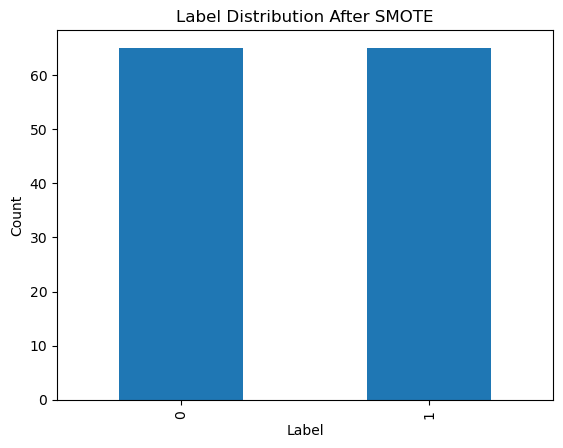

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("3323600036_Aulia Nurzahra Anantiyo_Data Imbalance.csv")
# Separate features and target variable
X = data.drop('Kelayakan Keringanan UKT', axis=1)
y = data['Kelayakan Keringanan UKT']

# Encode categorical features
encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with resampled data
resampled_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Kelayakan Keringanan UKT'])], axis=1)

# Visualize the class distribution after resampling
resampled_data['Kelayakan Keringanan UKT'].value_counts().plot(kind='bar')
plt.title('Label Distribution After SMOTE')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()